In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## DATA WRANGELING

In [7]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


## DATA VISUALIZATION

        age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
target                                                                         
0       499  499  499       499   499  499      499      499    499      499   
1       526  526  526       526   526  526      526      526    526      526   

        slope   ca  thal  
target                    
0         499  499   499  
1         526  526   526  


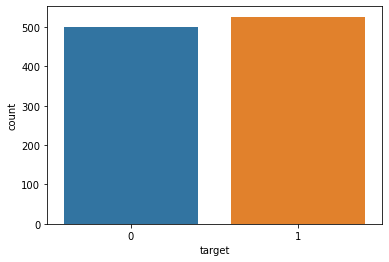

In [11]:
sns.countplot(data["target"])
print(data.groupby(["target"]).count())

# 0 -> No Heart Disease, 1 -> Heart Disease

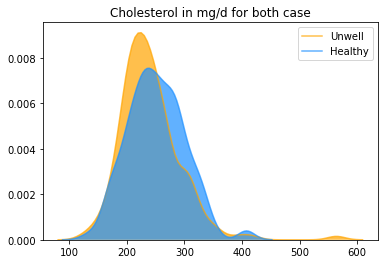

In [12]:
sns.kdeplot(data[data['target']==1]['chol'],shade=True,color="orange", label="Unwell", alpha=.7)
sns.kdeplot(data[data['target']==0]['chol'],shade=True,color="dodgerblue", label="Healthy", alpha=.7)
plt.title('Cholesterol in mg/d for both case')
plt.show()

<AxesSubplot:>

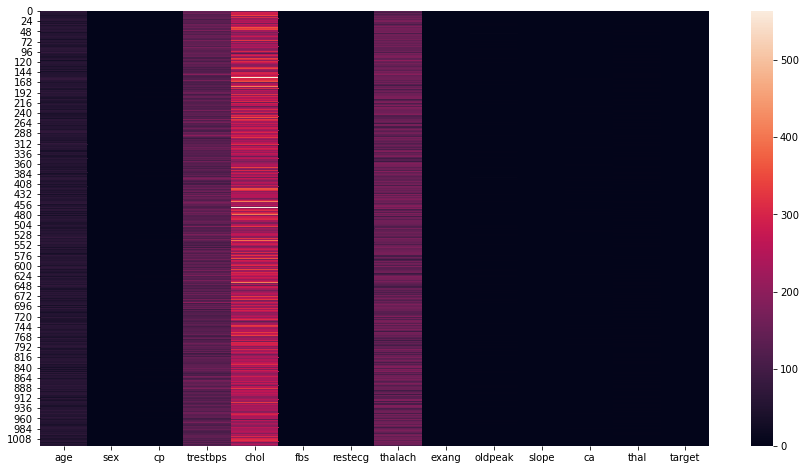

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data)

In [14]:
#sns.pairplot(data, hue="target")

<AxesSubplot:>

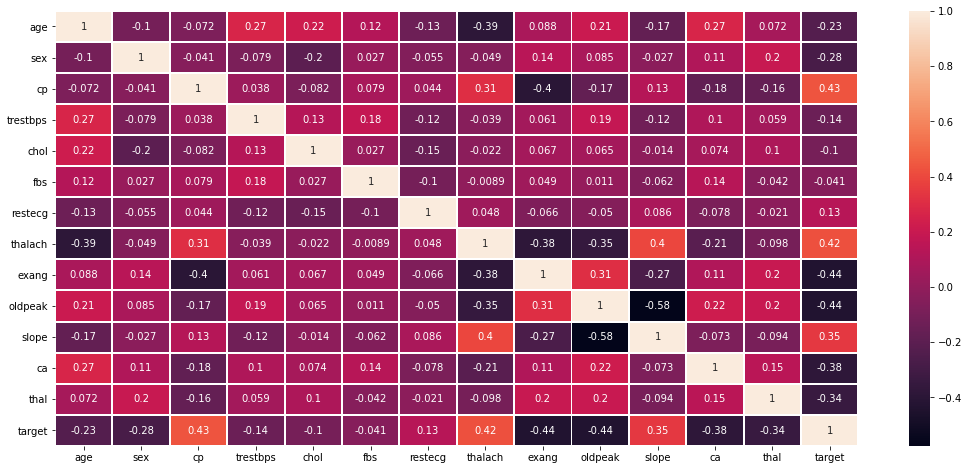

In [15]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(), annot=True, linewidths=1)

<AxesSubplot:>

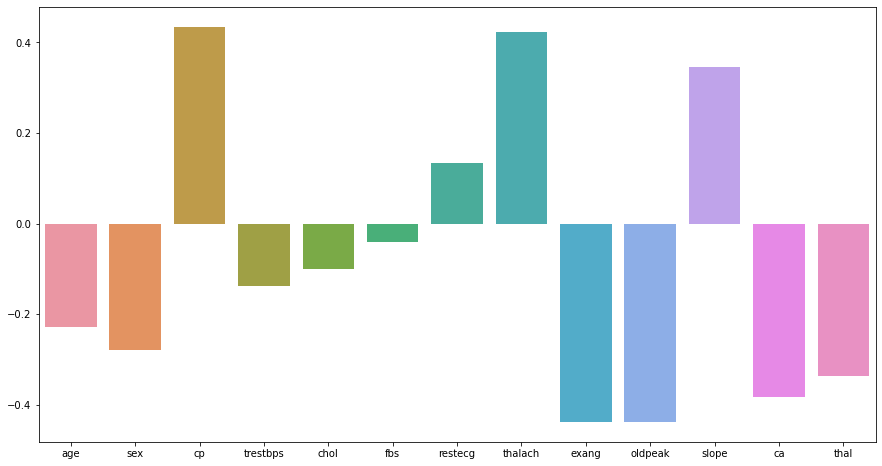

In [16]:
data_2 = data.drop(["target"],axis=1)
plt.figure(figsize=(15,8))
sns.barplot(data_2.corrwith(data.target).index, data_2.corrwith(data.target))

## Feature Selection

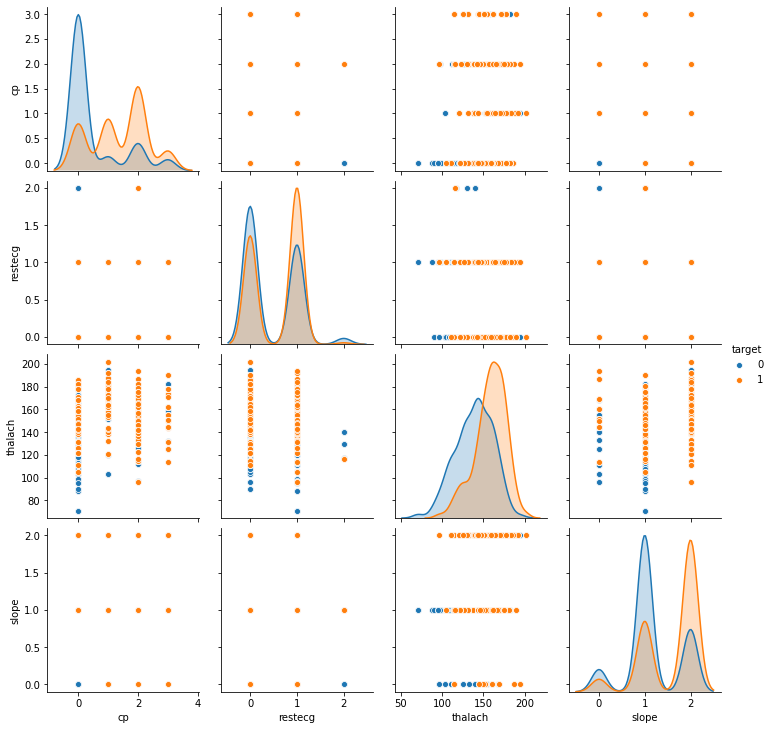

In [17]:
sns.pairplot(data, hue = "target", vars = ["cp","restecg","thalach","slope"])

## Selecting the Data from Dataset

In [18]:
# Selecting all the features

all_x = data.drop(("target"), axis=1)
all_x = np.array(all_x)

# Selecting only importent features

imp_x = data[["cp","restecg","thalach","slope"]]
imp_x = np.array(imp_x)


y = data["target"]
y = np.array(y).reshape(-1,1)

print(all_x)
print(imp_x)
print(y)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[[  0   1 168   2]
 [  0   0 155   0]
 [  0   1 125   0]
 ...
 [  0   0 118   1]
 [  0   0 159   2]
 [  0   1 113   1]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


## Feature Scalling

In [19]:
std_scl = StandardScaler()

all_x = std_scl.fit_transform(all_x)
imp_x = std_scl.fit_transform(imp_x)

all_x

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

<AxesSubplot:>

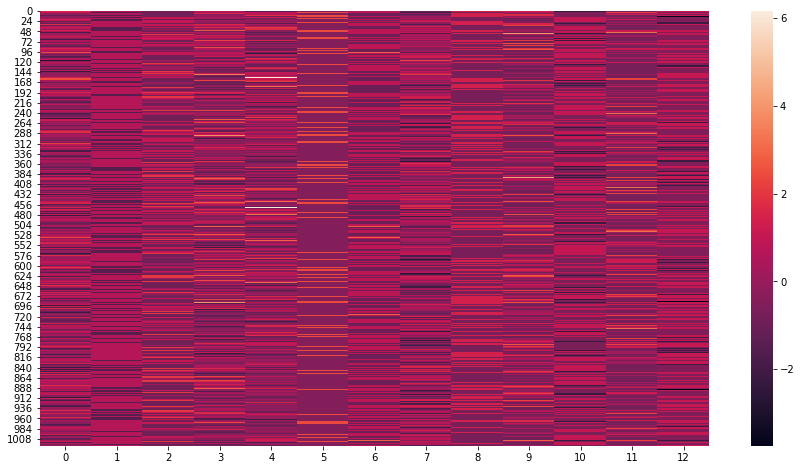

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(all_x)

## Train test Split

In [21]:
all_x_train,all_x_test,all_y_train,all_y_test = train_test_split(all_x, y, test_size = 0.2, random_state = 42)
all_x_train
#all_y_train

array([[-0.59927526,  0.66150409,  1.02761788, ...,  0.99543334,
         2.17981673, -0.52212231],
       [ 1.05491812, -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747, -1.51170646,  1.02761788, ...,  0.99543334,
        -0.73197147, -0.52212231],
       ...,
       [-0.37871614,  0.66150409, -0.91575542, ...,  0.99543334,
        -0.73197147,  1.08985168],
       [-1.26095261,  0.66150409, -0.91575542, ...,  0.99543334,
        -0.73197147,  1.08985168],
       [-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         0.23862459, -0.52212231]])

In [22]:
imp_x_train,imp_x_test,imp_y_train,imp_y_test = train_test_split(imp_x, y, test_size = 0.2, random_state = 42)
imp_x_train
#imp_y_train

array([[ 1.02761788, -1.00404855, -1.00520332,  0.99543334],
       [-0.91575542,  0.89125488,  0.21247924,  0.99543334],
       [ 1.02761788, -1.00404855,  0.77783186,  0.99543334],
       ...,
       [-0.91575542,  0.89125488,  1.03876384,  0.99543334],
       [-0.91575542,  0.89125488,  0.51689988,  0.99543334],
       [-0.91575542,  0.89125488,  0.47341122,  0.99543334]])

## Training and testing the model

## Logistic Regression

In [23]:
# Training and testing on all features.

lg_model = LogisticRegression()
lg_model.fit(all_x_train,all_y_train)
lg_model_prediction = lg_model.predict(all_x_test)
print("Accuracy on all features: ", accuracy_score(all_y_test,lg_model_prediction)*100)
print("R-square on all features: ", r2_score(all_y_test,lg_model_prediction))

Accuracy on all features:  79.51219512195122
R-square on all features:  0.18046830382638468


In [24]:
# Training and testing on selected features.

lg_model1 = LogisticRegression()
lg_model1.fit(imp_x_train,imp_y_train)
lg_model1_prediction = lg_model1.predict(imp_x_test)
print("Accuracy on Selected features: ", accuracy_score(imp_y_test,lg_model1_prediction)*100)
print("Accuracy on Selected features: ", r2_score(imp_y_test,lg_model1_prediction))

Accuracy on Selected features:  74.14634146341463
Accuracy on Selected features:  -0.034170949933371775


## Confusion Matrix

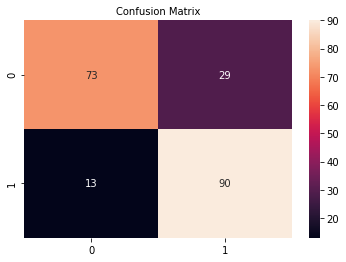

In [25]:
confu_matrix = confusion_matrix(all_y_test, lg_model_prediction)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True)
plt.show()

## Decision Tree

In [26]:
# Training and testing on all features.

dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(all_x_train,all_y_train)
dt_model_prediction = dt_model.predict(all_x_test)
print("Accuracy on all features: ", accuracy_score(all_y_test,dt_model_prediction)*100)
print("Accuracy on all features: ", r2_score(all_y_test,dt_model_prediction))

Accuracy on all features:  98.53658536585365
Accuracy on all features:  0.9414620217018846


In [27]:
# Training and testing on selected features.

dt_model1 = DecisionTreeClassifier(random_state = 42)
dt_model1.fit(imp_x_train,imp_y_train)
dt_model1_prediction = dt_model1.predict(imp_x_test)
print("Accuracy on selected features: ", accuracy_score(imp_y_test,dt_model1_prediction)*100)
print("Accuracy on selected features: ", r2_score(imp_y_test,dt_model1_prediction))

Accuracy on selected features:  94.14634146341463
Accuracy on selected features:  0.7658480868075385


## Confusion Matrix

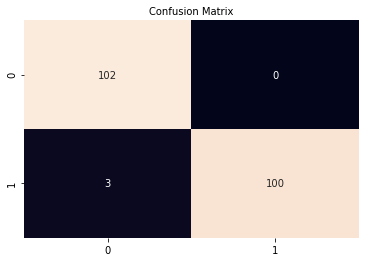

In [28]:
confu_matrix = confusion_matrix(all_y_test, dt_model_prediction)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True, cbar=False, fmt='g')
plt.show()

## Random Forest

In [29]:
# Training and testing on all features.

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(all_x_train,all_y_train)
rf_model_prediction = rf_model.predict(all_x_test)
print("Accuracy on all features: ", accuracy_score(all_y_test, rf_model_prediction)*100)

Accuracy on all features:  98.53658536585365


In [30]:
# Training and testing on selected features.

rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(imp_x_train,imp_y_train)
rf_model1_prediction = rf_model1.predict(imp_x_test)
print("Accuracy on selected features: ", accuracy_score(imp_y_test, rf_model1_prediction)*100)

Accuracy on selected features:  94.14634146341463


## Confusion Matrix

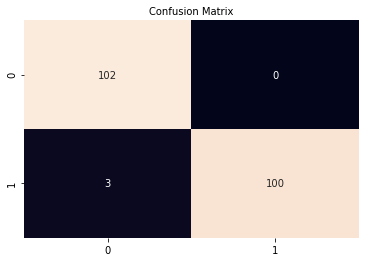

In [31]:
confu_matrix = confusion_matrix(all_y_test, rf_model_prediction)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True,cbar=False, fmt='g')
plt.show()

## Naive Bayes

In [32]:
# Training and testing on all features.

nb_model = GaussianNB()
nb_model.fit(all_x_train,all_y_train)
nb_model_prediction = nb_model.predict(all_x_test)
print("Accuracy on all features: ", accuracy_score(all_y_test, nb_model_prediction)*100)

Accuracy on all features:  80.0


In [33]:
# Training and testing on selected features.

nb_model1 = GaussianNB()
nb_model1.fit(imp_x_train,imp_y_train)
nb_model1_prediction = nb_model1.predict(imp_x_test)
print("Accuracy on selected features: ", accuracy_score(imp_y_test, nb_model1_prediction)*100)

Accuracy on selected features:  72.6829268292683


## Confusion Matrix

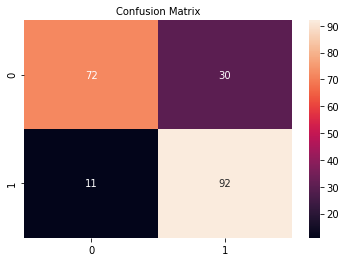

In [34]:
confu_matrix = confusion_matrix(all_y_test, nb_model_prediction)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True)
plt.show()

## SVM

In [35]:
# Training and testing on all features.

svm_model = SVC()
svm_model.fit(all_x_train,all_y_train)
svm_model_prediction = svm_model.predict(all_x_test)
print("Accuracy on all features: ", accuracy_score(all_y_test, svm_model_prediction)*100)

Accuracy on all features:  88.78048780487805


In [36]:
# Training and testing on selected features.

svm_model1 = SVC()
svm_model1.fit(imp_x_train,imp_y_train)
svm_model1_prediction = svm_model1.predict(imp_x_test)
print("Accuracy on all features: ", accuracy_score(imp_y_test, svm_model1_prediction)*100)

Accuracy on all features:  76.58536585365854


## Confusion Matrix

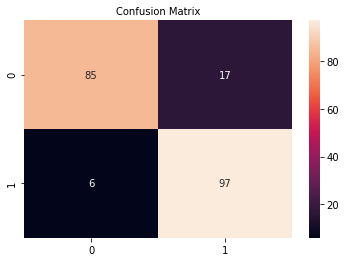

In [37]:
confu_matrix = confusion_matrix(all_y_test, svm_model_prediction)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True)
plt.show()

## Saving Random Forest Classifier using Pickle

In [38]:
# save model
pickle.dump(rf_model,open('model.pkl','wb'))

# Load Model
heart_disease_prediction_model = pickle.load(open('model.pkl','rb'))

y_predict = heart_disease_prediction_model.predict(all_x_test)

print("confusion matrix: \n", confusion_matrix(all_y_test,y_predict))
accuracy_score(all_y_test,y_predict)

confusion matrix: 
 [[102   0]
 [  3 100]]


0.9853658536585366